In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
train=pd.read_csv('bank-additional-full.csv', sep=';')

In [ ]:
train


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: xlabel='count', ylabel='y'>

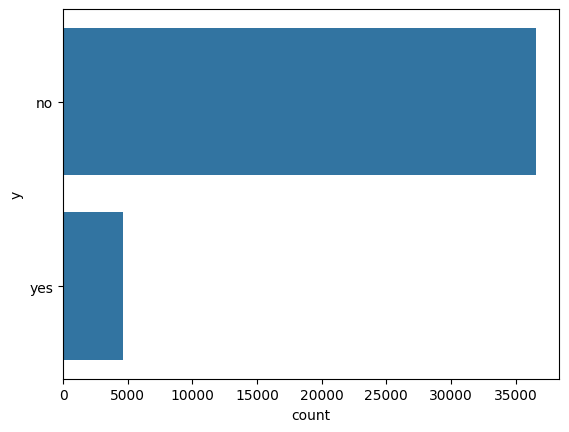

In [ ]:
sns.countplot(y=train['y'])

<Axes: xlabel='count', ylabel='marital'>

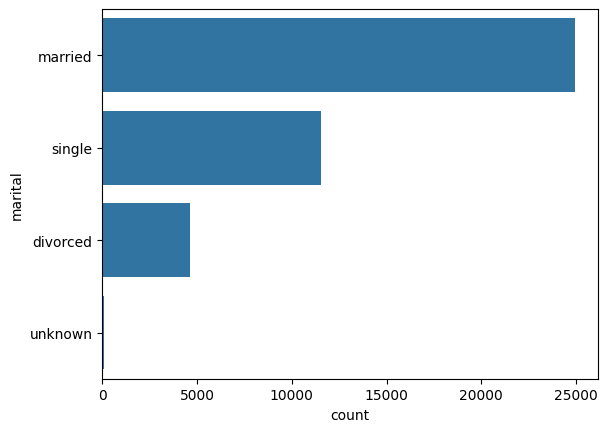

In [ ]:
sns.countplot(y=train['marital'])

<Axes: xlabel='count', ylabel='education'>

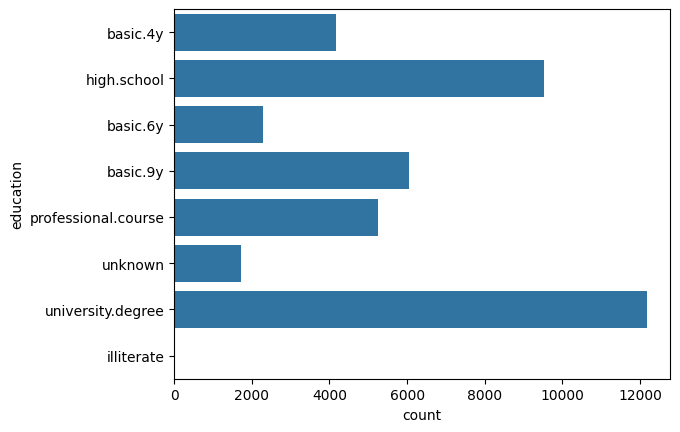

In [ ]:
sns.countplot(y=train['education'])

<Axes: xlabel='count', ylabel='month'>

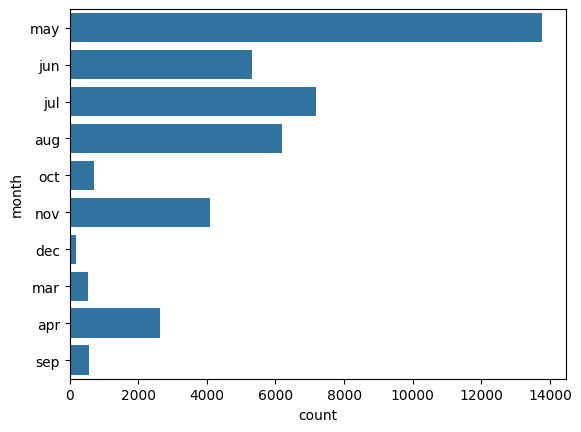

In [ ]:
sns.countplot(y=train['month'])


<Axes: xlabel='count', ylabel='day_of_week'>

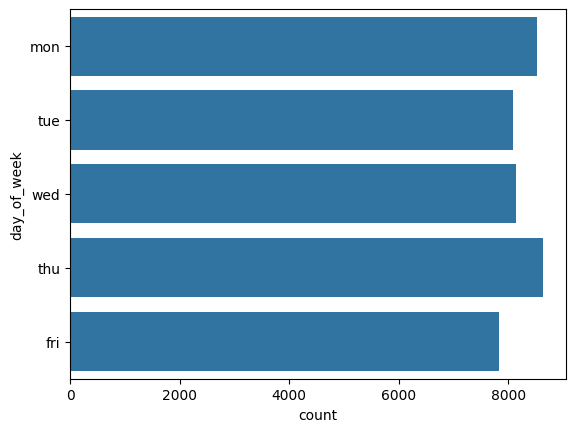

In [ ]:
sns.countplot(y=train['day_of_week'])

<Axes: xlabel='count', ylabel='job'>

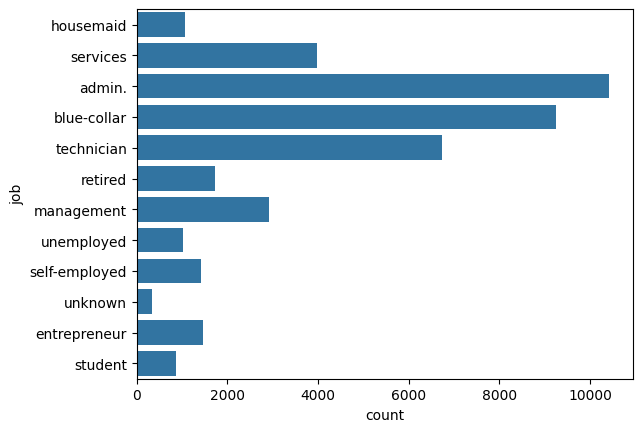

In [ ]:
sns.countplot(y=train['job'])

In [ ]:
train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
train['previous'].unique()
train['previous'].value_counts()

,count
previous,
0,35563
1,4561
2,754
3,216
4,70
5,18
6,5
7,1


In [ ]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
train.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
print("shape before remove dubt:", train.shape)
train=train.drop_duplicates()
print("shape after remove dubt:", train.shape)

shape before remove dubt: (41188, 21)
shape after remove dubt: (41176, 21)


In [ ]:
# Replace "unknown" with NaN in non-numeric columns
for col in train.select_dtypes(exclude=['number']):
  train[col] = train[col].replace('unknown', np.nan)
train['poutcome'] = train['poutcome'].replace('nonexistent',np.nan)


In [ ]:
train.isnull().sum()

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:

null_percentages = train.isnull().sum() * 100 / len(train)
null_percentages

,0
age,0.000000
job,0.801438
marital,0.194288
education,4.201477
default,20.876239
housing,2.404313
loan,2.404313
contact,0.000000
month,0.000000
day_of_week,0.000000


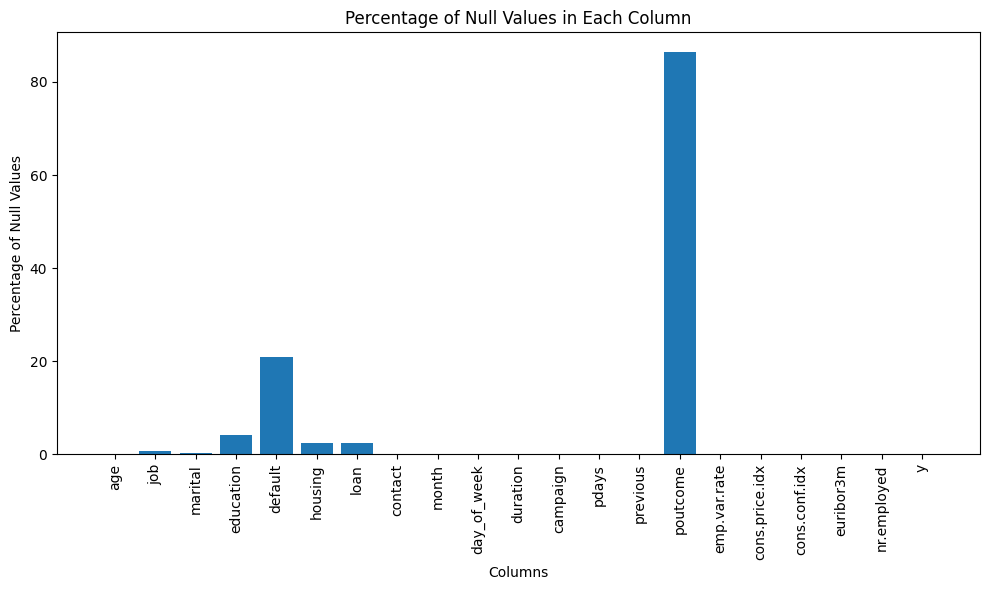

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(null_percentages.index, null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in Each Column")
plt.tight_layout()
plt.show()

In [ ]:
train = train.drop('poutcome', axis=1)

In [ ]:
trian=train.dropna()

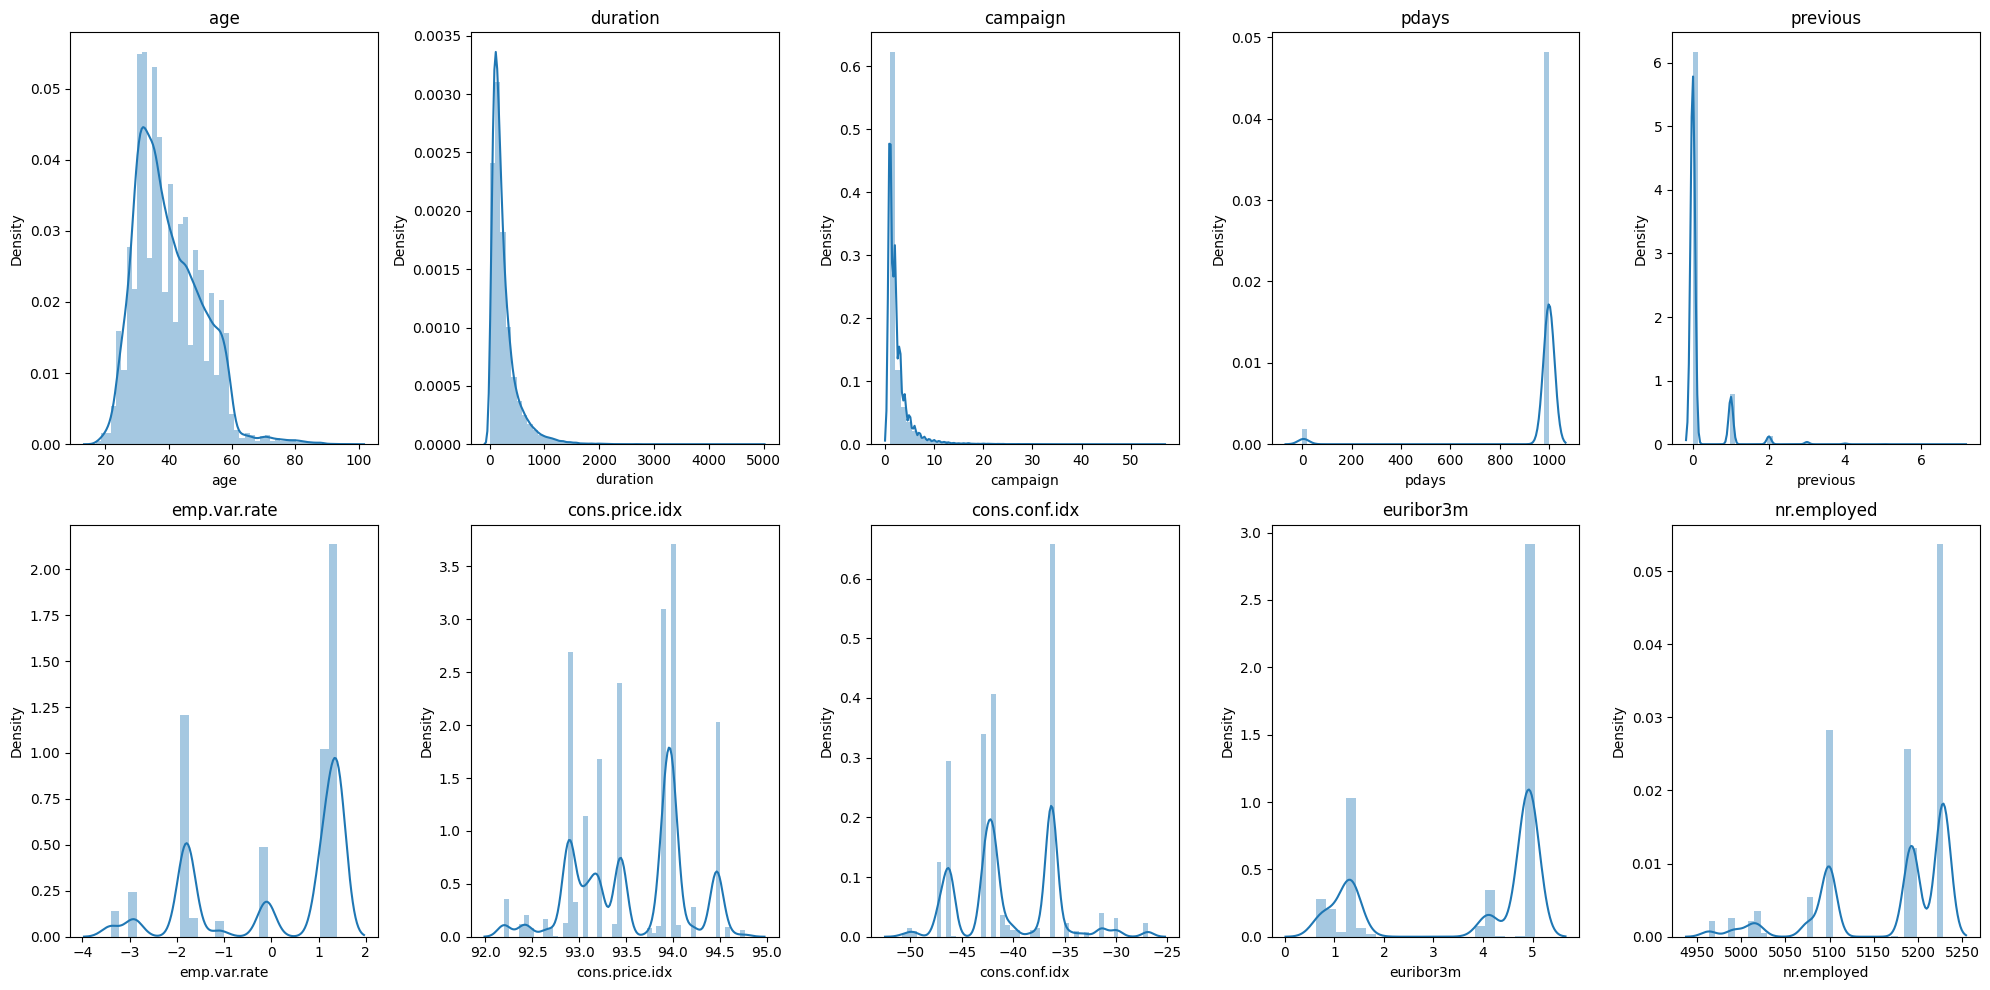

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i, col in enumerate(columns):
    train[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.distplot(train[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
# Compute skewness for each numeric column
numeric_cols = train.select_dtypes(include=['number']).columns
skewness = train[numeric_cols].skew()
skewness

,0
age,0.784560
duration,3.262808
campaign,4.762044
pdays,-4.921386
previous,3.831396
emp.var.rate,-0.724061
cons.price.idx,-0.230853
cons.conf.idx,0.302876
euribor3m,-0.709194
nr.employed,-1.044317


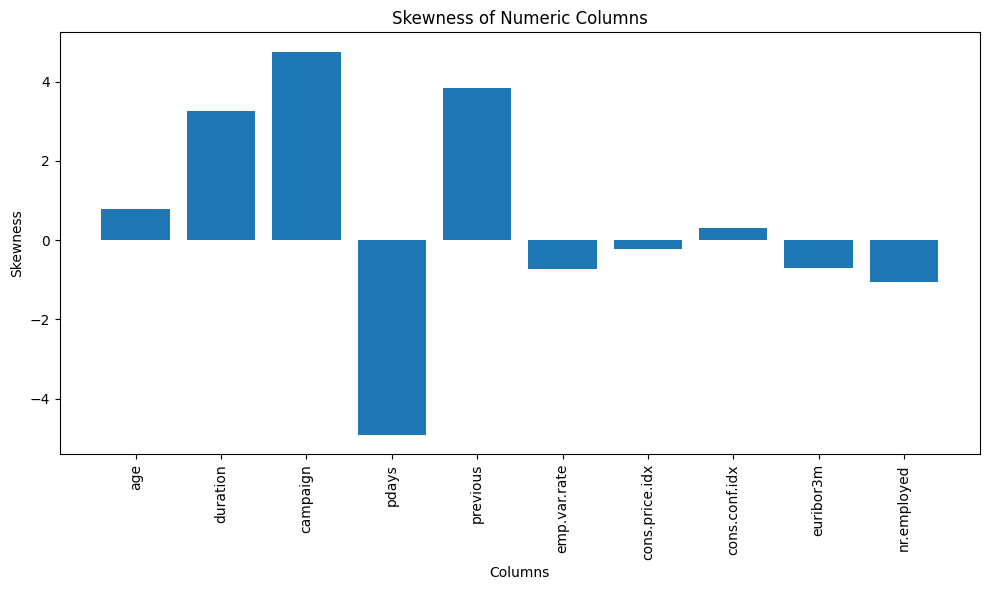

In [ ]:


# Create a bar plot of skewness
plt.figure(figsize=(10, 6))
plt.bar(skewness.index, skewness.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.title("Skewness of Numeric Columns")
plt.tight_layout()
plt.show()

In [ ]:
# Apply log1p transformation to selected columns
for col in ['duration', 'campaign', 'pdays','previous']:
    train[col] = np.log(train[col])

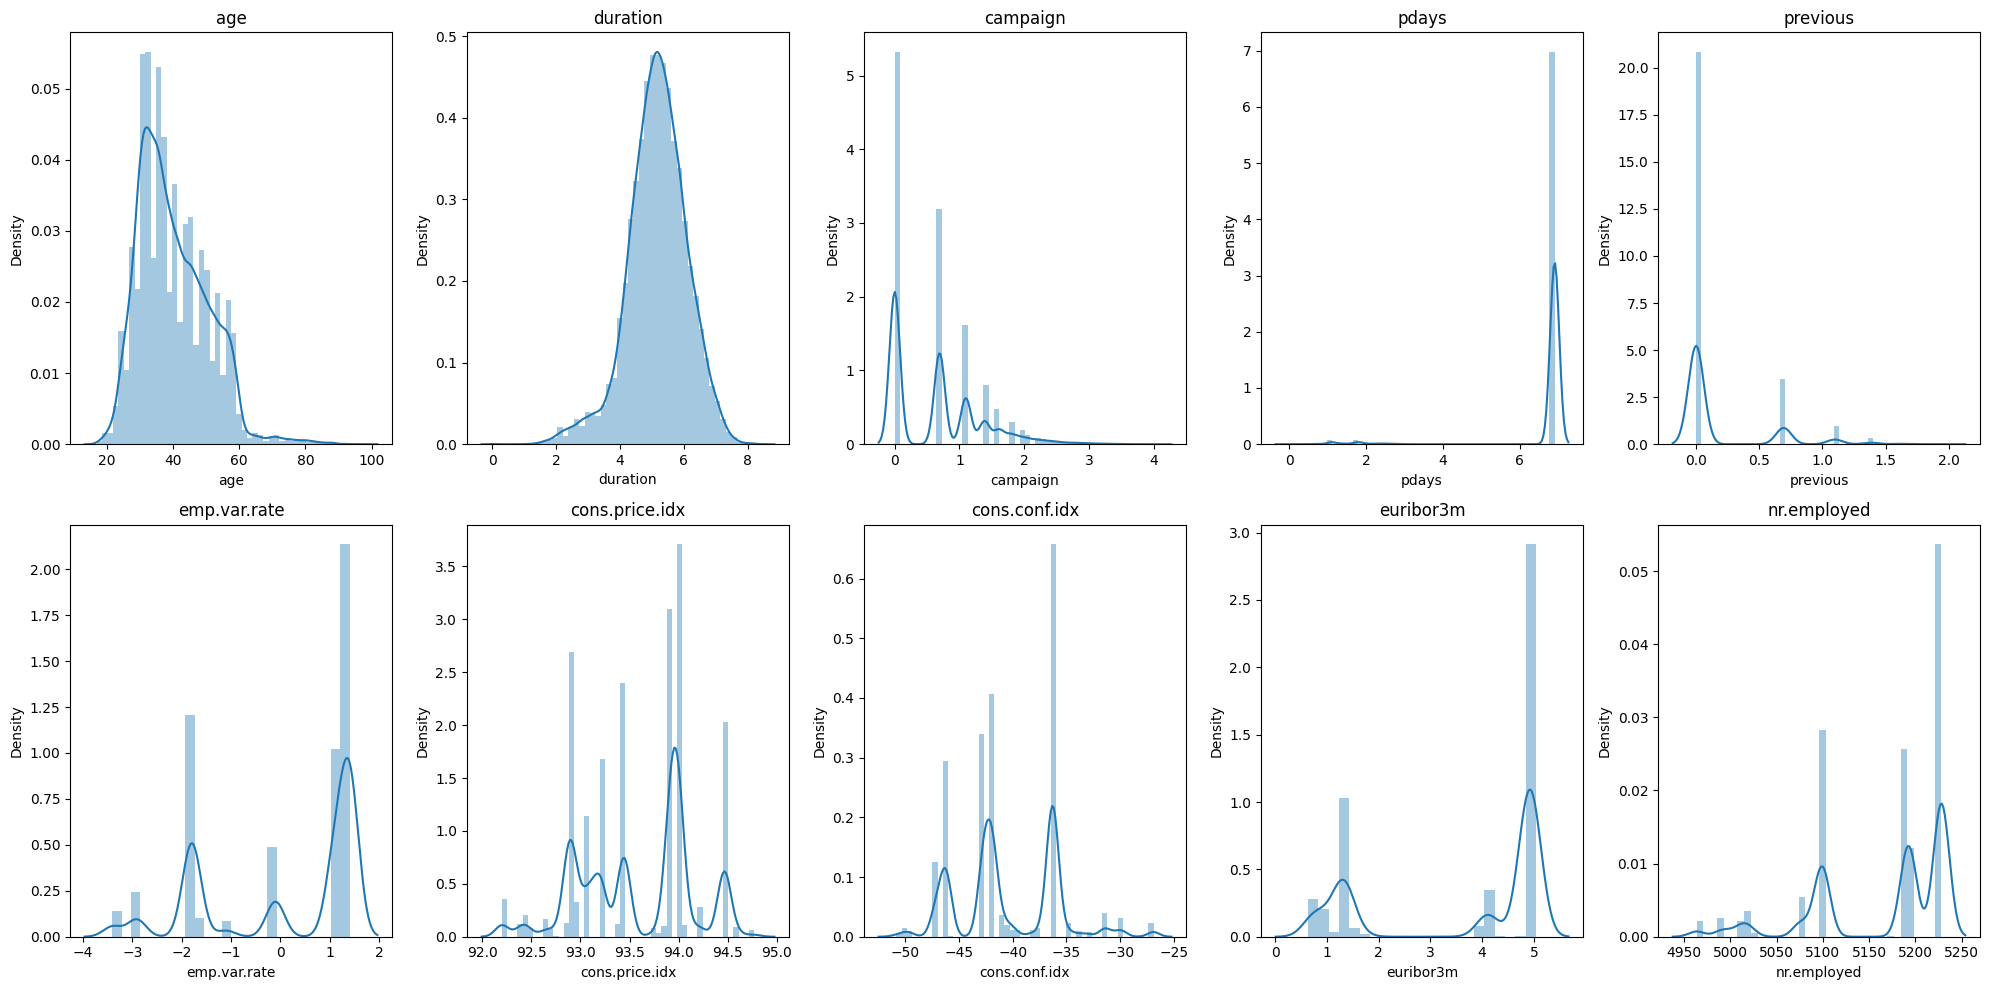

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create distplots for each column
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i, col in enumerate(columns):
    # Check for infinite values and replace them with NaN
    train[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.distplot(train[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

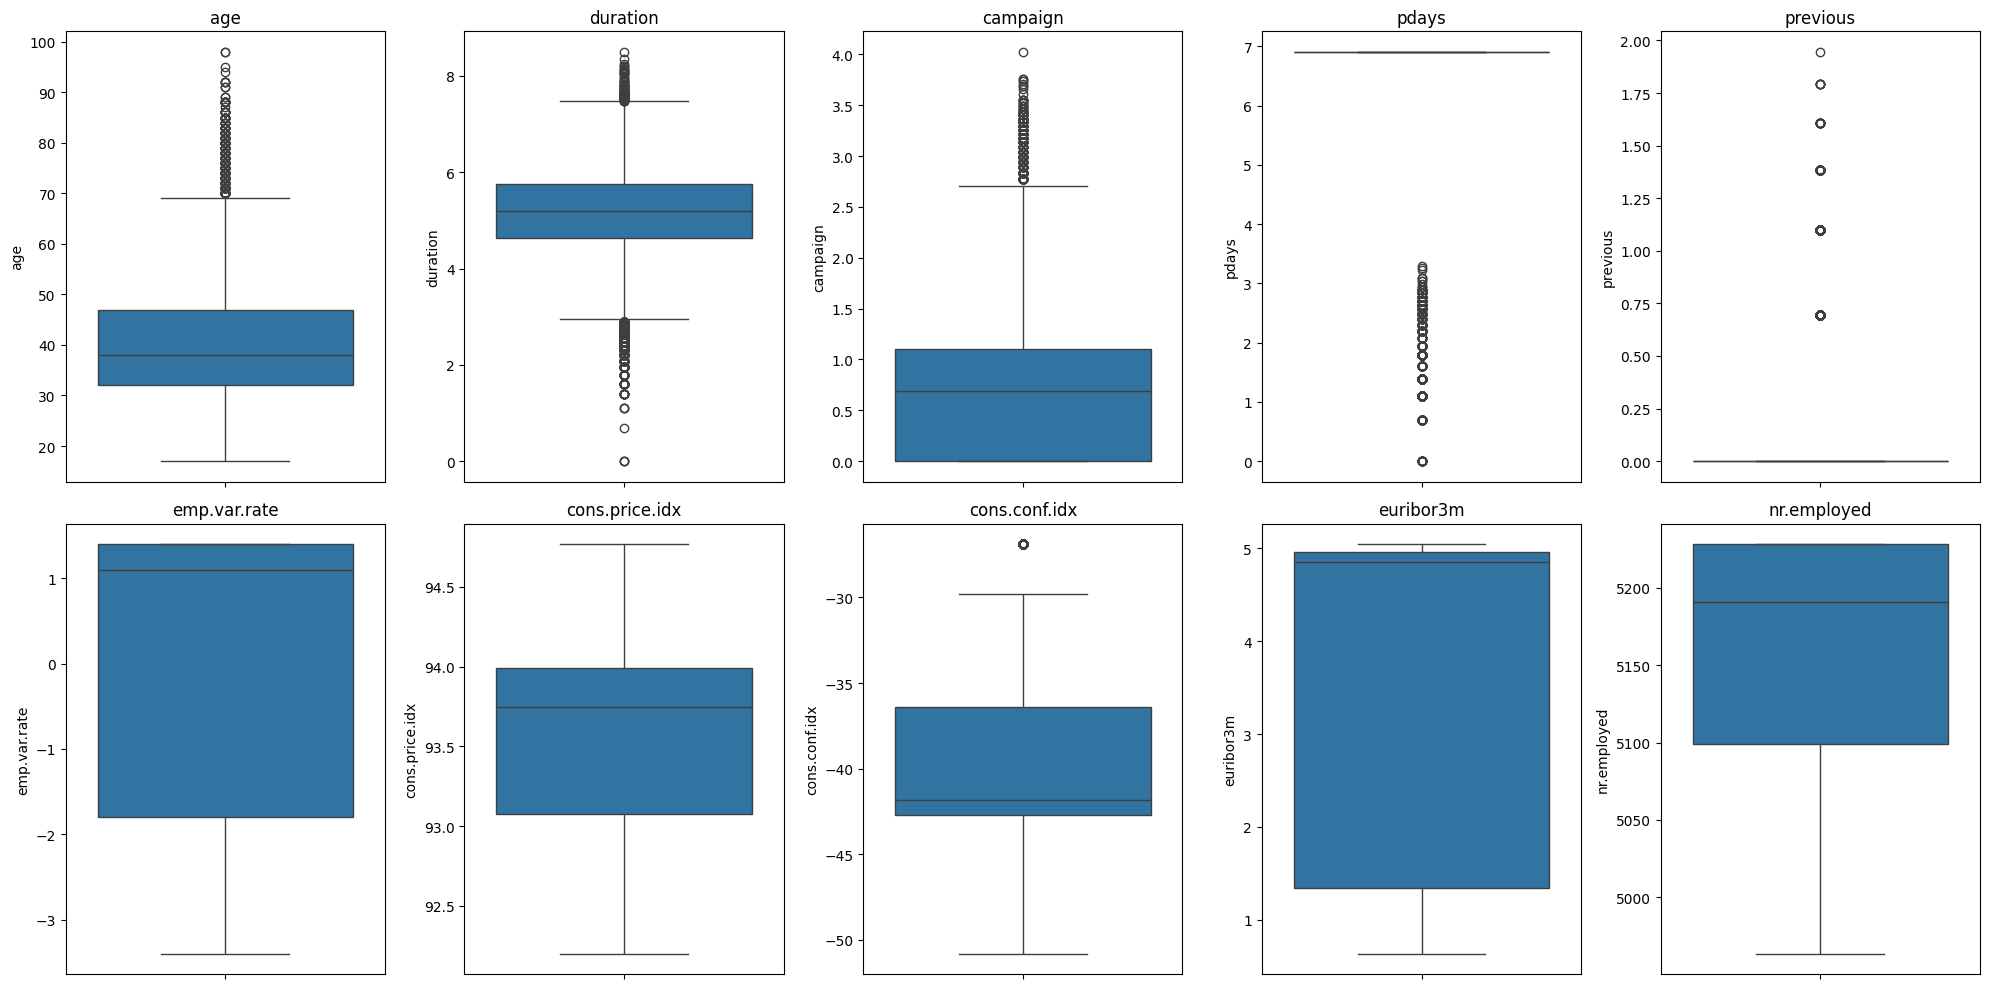

In [ ]:

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create distplots for each column
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i, col in enumerate(columns):
    # Check for infinite values and replace them with NaN
    train[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.boxplot(train[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:

cols_to_check = ['age', 'duration']

# Calculate the IQR for each specified column
Q1 = train[cols_to_check].quantile(0.25)
Q3 = train[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train[cols_to_check] = train[cols_to_check][~((train[cols_to_check] < lower_bound) | (train[cols_to_check] > upper_bound)).any(axis=1)]

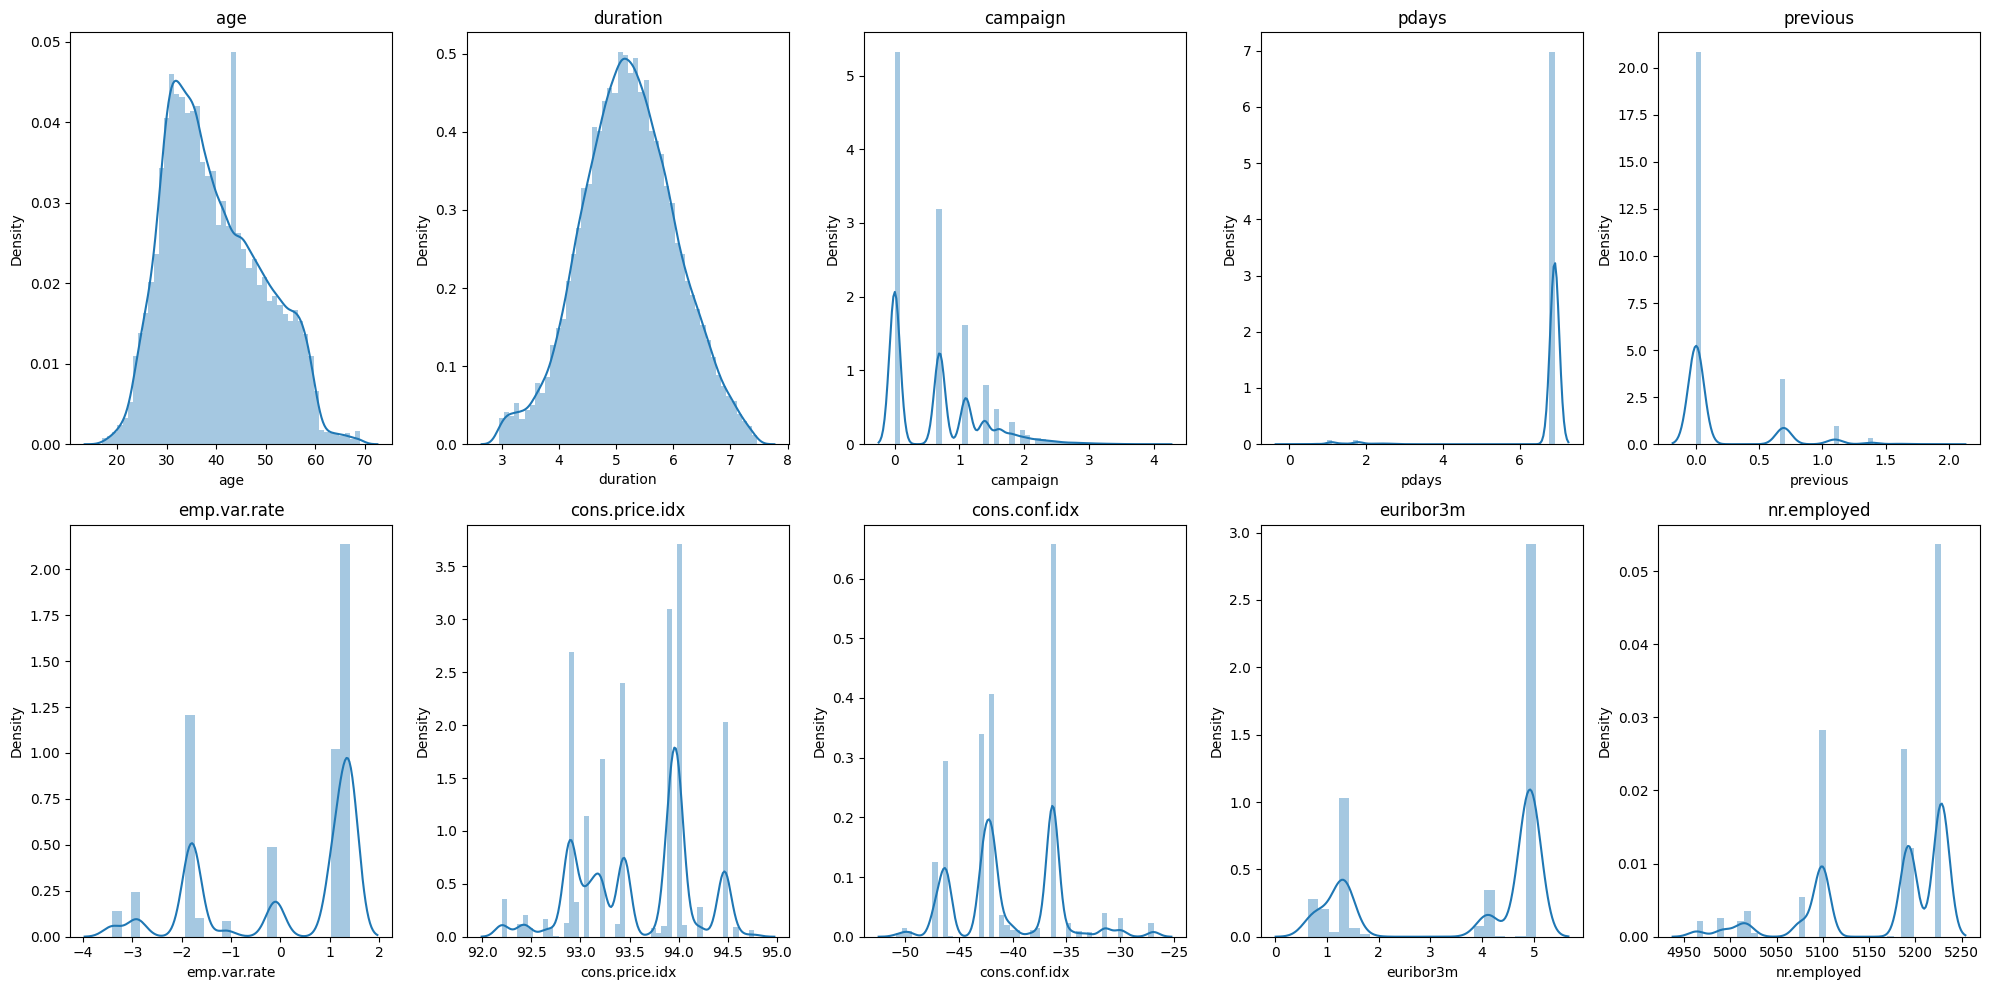

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

axes = axes.flatten()


columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i, col in enumerate(columns):
    train[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    sns.distplot(train[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
train.isnull().sum()

,0
age,1529
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
train=train.dropna()

In [ ]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000,4396.000000
mean,38.804595,5.296051,0.473467,5.447965,0.157362,-1.778594,93.130954,-41.558576,1.514708,5078.239832
std,10.523771,0.767435,0.548538,2.380786,0.346373,0.898521,0.578017,6.191738,1.077569,65.569769
min,17.000000,2.944439,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,4.779123,0.000000,2.484907,0.000000,-1.800000,92.893000,-46.200000,0.878000,5017.500000
50%,36.000000,5.298317,0.000000,6.906755,0.000000,-1.800000,92.963000,-42.000000,1.266000,5099.100000
75%,46.000000,5.805135,0.693147,6.906755,0.000000,-1.700000,93.200000,-38.300000,1.365000,5099.100000
max,69.000000,7.464510,2.484907,6.906755,1.945910,-0.100000,94.767000,-26.900000,4.968000,5195.800000


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numeric_cols = train.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()

train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [ ]:
train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24019,0.442308,services,married,high.school,no,yes,no,telephone,oct,tue,0.448085,0.000000,1.000000,0.000000,1.00000,0.622369,0.435146,1.000000,1.0,yes
24076,0.365385,admin.,married,university.degree,no,yes,no,telephone,nov,wed,0.699676,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.929626,1.0,no
24102,0.365385,admin.,married,high.school,no,yes,no,telephone,nov,wed,0.396401,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.842640,1.0,yes
24108,0.384615,admin.,married,university.degree,no,yes,no,telephone,nov,wed,0.405897,0.000000,0.259421,0.000000,1.00000,0.389322,0.368201,0.842640,1.0,no
24113,0.230769,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,0.334045,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.833180,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,0.442308,management,divorced,university.degree,no,yes,no,cellular,nov,wed,0.605241,0.278943,1.000000,0.712414,0.69697,1.000000,0.000000,0.091371,0.0,no
41173,0.865385,retired,married,university.degree,no,yes,no,cellular,nov,thu,0.630879,0.000000,1.000000,0.356207,0.69697,1.000000,0.000000,0.091601,0.0,yes
41174,0.865385,retired,married,university.degree,no,yes,no,cellular,nov,thu,0.529438,0.000000,0.000000,0.920782,0.69697,1.000000,0.000000,0.091601,0.0,yes
41178,0.865385,retired,married,university.degree,no,no,no,cellular,nov,thu,0.715825,0.278943,0.259421,0.564575,0.69697,1.000000,0.000000,0.091601,0.0,yes


In [ ]:
train1=train.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_mappings = {}
for col in train1.select_dtypes(include=['object']):
  train1[col] = le.fit_transform(train[col])


In [ ]:
def inverse_transform(df, label_mappings):
  df_copy = df.copy()
  for col, mapping in label_mappings.items():
    inverse_mapping = {v: k for k, v in mapping.items()}
    df_copy[col] = df_copy[col].map(inverse_mapping)
  return df_copy

In [ ]:
train_reversed = inverse_transform(train1, label_mappings)

In [ ]:
display(train)
display(train_reversed)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24019,0.442308,services,married,high.school,no,yes,no,telephone,oct,tue,0.448085,0.000000,1.000000,0.000000,1.00000,0.622369,0.435146,1.000000,1.0,yes
24076,0.365385,admin.,married,university.degree,no,yes,no,telephone,nov,wed,0.699676,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.929626,1.0,no
24102,0.365385,admin.,married,high.school,no,yes,no,telephone,nov,wed,0.396401,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.842640,1.0,yes
24108,0.384615,admin.,married,university.degree,no,yes,no,telephone,nov,wed,0.405897,0.000000,0.259421,0.000000,1.00000,0.389322,0.368201,0.842640,1.0,no
24113,0.230769,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,0.334045,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.833180,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,0.442308,management,divorced,university.degree,no,yes,no,cellular,nov,wed,0.605241,0.278943,1.000000,0.712414,0.69697,1.000000,0.000000,0.091371,0.0,no
41173,0.865385,retired,married,university.degree,no,yes,no,cellular,nov,thu,0.630879,0.000000,1.000000,0.356207,0.69697,1.000000,0.000000,0.091601,0.0,yes
41174,0.865385,retired,married,university.degree,no,yes,no,cellular,nov,thu,0.529438,0.000000,0.000000,0.920782,0.69697,1.000000,0.000000,0.091601,0.0,yes
41178,0.865385,retired,married,university.degree,no,no,no,cellular,nov,thu,0.715825,0.278943,0.259421,0.564575,0.69697,1.000000,0.000000,0.091601,0.0,yes


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24019,0.442308,7,1,3,0,1,0,1,8,3,0.448085,0.000000,1.000000,0.000000,1.00000,0.622369,0.435146,1.000000,1.0,1
24076,0.365385,0,1,6,0,1,0,1,7,4,0.699676,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.929626,1.0,0
24102,0.365385,0,1,3,0,1,0,1,7,4,0.396401,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.842640,1.0,1
24108,0.384615,0,1,6,0,1,0,1,7,4,0.405897,0.000000,0.259421,0.000000,1.00000,0.389322,0.368201,0.842640,1.0,0
24113,0.230769,6,1,6,0,1,0,1,7,2,0.334045,0.000000,1.000000,0.000000,1.00000,0.389322,0.368201,0.833180,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41170,0.442308,4,0,6,0,1,0,0,7,4,0.605241,0.278943,1.000000,0.712414,0.69697,1.000000,0.000000,0.091371,0.0,0
41173,0.865385,5,1,6,0,1,0,0,7,2,0.630879,0.000000,1.000000,0.356207,0.69697,1.000000,0.000000,0.091601,0.0,1
41174,0.865385,5,1,6,0,1,0,0,7,2,0.529438,0.000000,0.000000,0.920782,0.69697,1.000000,0.000000,0.091601,0.0,1
41178,0.865385,5,1,6,0,0,0,0,7,2,0.715825,0.278943,0.259421,0.564575,0.69697,1.000000,0.000000,0.091601,0.0,1


In [ ]:
for col in train.select_dtypes(include=['object']):
  print(f"Column: {col}")
  print(f"  Original unique values: {train_reversed[col].unique()}")
  print(f"  Encoded unique values: {train[col].unique()}")

Column: job
  Original unique values: [ 7  0  6  9  4  2  5 10  1  3  8]
  Encoded unique values: ['services' 'admin.' 'self-employed' 'technician' 'management'
 'entrepreneur' 'retired' 'unemployed' 'blue-collar' 'housemaid' 'student']
Column: marital
  Original unique values: [1 0 2]
  Encoded unique values: ['married' 'divorced' 'single']
Column: education
  Original unique values: [3 6 5 2 0 1 4]
  Encoded unique values: ['high.school' 'university.degree' 'professional.course' 'basic.9y'
 'basic.4y' 'basic.6y' 'illiterate']
Column: default
  Original unique values: [0 1]
  Encoded unique values: ['no' 'yes']
Column: housing
  Original unique values: [1 0]
  Encoded unique values: ['yes' 'no']
Column: loan
  Original unique values: [0 1]
  Encoded unique values: ['no' 'yes']
Column: contact
  Original unique values: [1 0]
  Encoded unique values: ['telephone' 'cellular']
Column: month
  Original unique values: [8 7 5 0 6 4 3 1 9 2]
  Encoded unique values: ['oct' 'nov' 'mar' 'apr' '

In [ ]:
x=train1.drop('y', axis=1)
y=train1['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% training and 20% test

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))

0.8045454545454546
1.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(1, 20),
    'min_samples_leaf': np.arange(1, 20),
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 16, 'min_samples_split': 2}
Best Score: 0.8424321899650847
Best Parameters: {'min_samples_split': 6, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'gini'}
Best Score: 0.8344675417043839


In [ ]:
best_params = grid_search.best_params_
clf_best = tree.DecisionTreeClassifier(**best_params)
clf_best.fit(X_train, y_train)
y_pred_test = clf_best.predict(X_test)
y_pred_train = clf_best.predict(X_train)
print("Test pred accuracy ",accuracy_score(y_test, y_pred_test))
print("train pred accuracy",accuracy_score(y_train, y_pred_train))

Test pred accuracy  0.8545454545454545
train pred accuracy 0.8540955631399317


In [ ]:
best_params2 = random_search.best_params_
clf_best2 = tree.DecisionTreeClassifier(**best_params2)
clf_best2.fit(X_train, y_train)
y_pred_test2 = clf_best.predict(X_test)
y_pred_train2 = clf_best.predict(X_train)
print("Test pred accuracy ",accuracy_score(y_test, y_pred_test2))
print("train pred accuracy",accuracy_score(y_train, y_pred_train2))

Test pred accuracy  0.8545454545454545
train pred accuracy 0.8540955631399317


<Axes: >

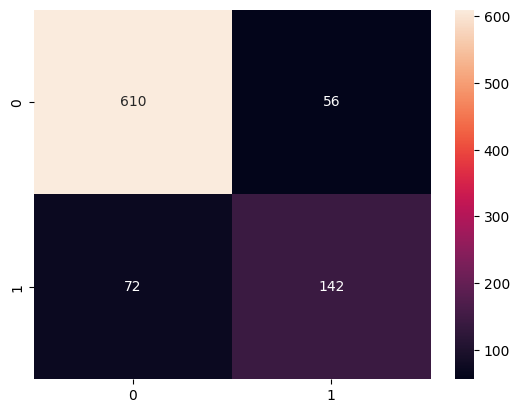

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       666
           1       0.72      0.66      0.69       214

    accuracy                           0.85       880
   macro avg       0.81      0.79      0.80       880
weighted avg       0.85      0.85      0.85       880



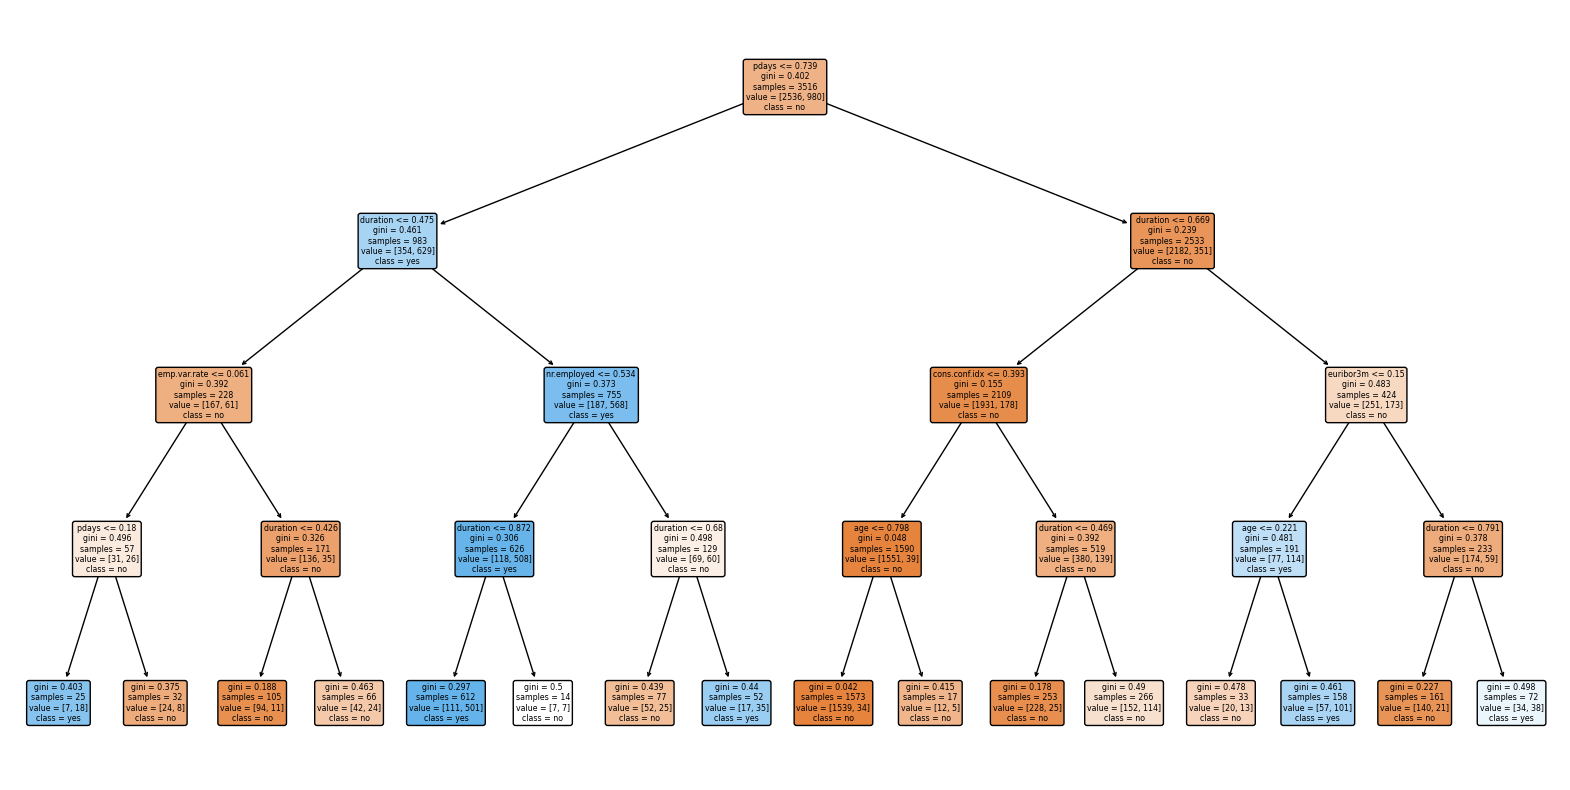

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf_best, filled=True, feature_names=x.columns, class_names=['no', 'yes'], rounded=True)
plt.show()